In [1]:
!jt -r

Reset css and font defaults in:
C:\Users\CAJug\.jupyter\custom &
C:\Users\CAJug\AppData\Roaming\jupyter\nbextensions


# Linear Regression

In order to understand the exercice, make sure to visit the following website, where this exercise was found : https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4121986-programmez-votre-premiere-regression-lineaire

The global aim is to predict the rent value regarding the surface of an apartment.

For this purpose, we will be using the "house.csv" file which basically store our data.

In [28]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from pylab import *

In [3]:
# opening the csv file with pandas' function
df = pd.read_csv("house.csv")

Assuming you already know the data, go to the point cloud plot.

Else, the first step is always to check your data by exploring them.

In [4]:
df.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


As we can see, we basically see what's inside each columns with their labeled names. Since rent values and surface are continuous values, we make sure that we can use regression.

In [5]:
df.describe()

,loyer,surface
count,545.000000,545.000000
mean,2307.502752,63.236697
std,2201.364353,48.716475
min,488.000000,11.000000
25%,1255.000000,32.000000
50%,1795.000000,50.000000
75%,2600.000000,76.000000
max,25000.000000,415.000000


Easily, we can see that our dataset contains 545 rows.

Moreover, we can explore basic statistics indicators as mean, standard deviation, quartiles, min and max of each column independently.

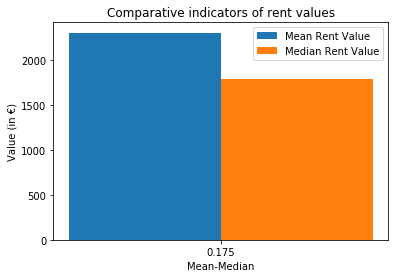

In [6]:
index = np.arange(1)

bar_width = 0.35

fig, ax = plt.subplots()
mean_rent = ax.bar(index, df["loyer"].mean(), bar_width,
                label="Mean Rent Value")

med_rent = ax.bar(index+bar_width, df["loyer"].median(),
                 bar_width, label="Median Rent Value")

ax.set_xlabel('Mean-Median')
ax.set_ylabel('Value (in €)')
ax.set_title('Comparative indicators of rent values')
ax.set_xticks(index + bar_width / 2)
ax.legend()

plt.show()

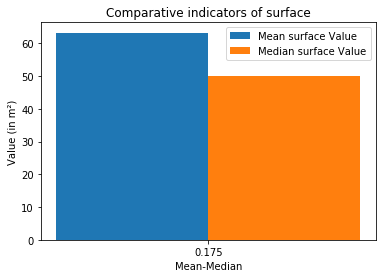

In [7]:
index = np.arange(1)

bar_width = 0.35

fig, ax = plt.subplots()
mean_rent = ax.bar(index, df["surface"].mean(), bar_width,
                label="Mean surface Value")

med_rent = ax.bar(index+bar_width, df["surface"].median(),
                 bar_width, label="Median surface Value")

ax.set_xlabel('Mean-Median')
ax.set_ylabel('Value (in m²)')
ax.set_title('Comparative indicators of surface')
ax.set_xticks(index + bar_width / 2)
ax.legend()

plt.show()

One interesting things in data is that we can clearly consider the fact that there are outliers which pull up the mean away from the median.

It means that, there are probably high valued and huge surface apartment in the dataset which are not balanced by little ones.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 2 columns):
loyer      545 non-null int64
surface    545 non-null int64
dtypes: int64(2)
memory usage: 8.6 KB


Here we do a last exploration, by ensuring there are no "none" - "NaN" or "null" values if you prefer. 

We also see if we get a unique type for each column.

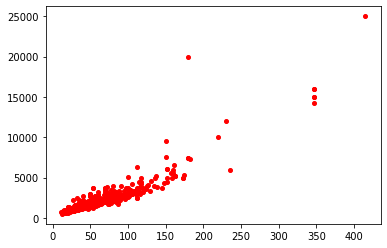

In [9]:
plt.plot(df['surface'], df['loyer'], 'ro', markersize=4)
rcParams['figure.figsize'] = (10, 6)
plt.show()

In this plot, we can clearly see that data can be represented more or less by a linear line.

Thus, it confirms what we were saying early on on outliers, then we want to eliminate them from our prediction model.

In [10]:
rent = df["loyer"]
removed_rent = rent.between(rent.quantile(0), rent.quantile(0.95))
# note that we can use df[~removed_rent].index to get the contrary of the next line just by adding a tilde
index_kept = df[removed_rent].index
preprocessed_df = df.loc[index_kept]

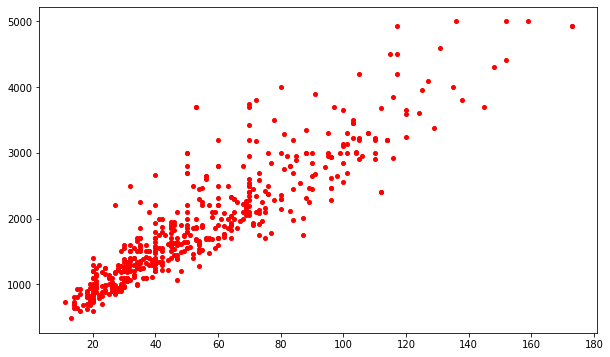

In [11]:
plt.plot(preprocessed_df['surface'], preprocessed_df['loyer'], 'ro', markersize=4)
rcParams['figure.figsize'] = (10, 6)
plt.show()

We then obtain a much more condensed and globaly representative dataset

## Training the model

Since we finished to correctly explore our data, we can now on proceed to the training of our model. 

We will simply use the linear regression implemented in Scikit-learn's package. But firstly, we should be aware of the 0.8/0.2 law which tells us to split our dataset between the training set (80% of the initial one) and the test set (20% of initial one).

This process was created in order to evaluate the efficiency of our model while preventing overfitting.

In [12]:
preprocessed_df.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


In [13]:
Y = pd.DataFrame(preprocessed_df["surface"])
X = preprocessed_df.drop(labels='surface', axis=1)

In [14]:
X.head()

,loyer
0,1330
1,1400
2,904
3,955
4,2545


In [15]:
Y.head()

,surface
0,37
1,32
2,26
3,30
4,70


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("Training set count X:{}/Y:{}, Test set count X:{}/Y:{}".format(
    int(X_train.count()), int(Y_train.count()), int(X_test.count()), int(Y_test.count())))

Training set count X:413/Y:413, Test set count X:104/Y:104


In [17]:
LinearRegression = linear_model.LinearRegression()
LinearRegression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predictions

In order to see the performance of our model, we should now predicts on the test set and compare the results.

In [18]:
prediction = LinearRegression.predict(X_test)
print('Coefficients: \n', LinearRegression.coef_)
def evaluation_linearRegression(Y_test,prediction):
# The mean squared error
    print("Mean absolute error: %.2f"% mean_absolute_error(Y_test, prediction))
    print("Median absolute error: %.2f"% median_absolute_error(Y_test, prediction))
    print('Variance score: %.2f' % r2_score(Y_test, prediction))
evaluation_linearRegression(Y_test,prediction)

Coefficients: 
 [[0.03013122]]
Mean absolute error: 9.81
Median absolute error: 7.32
Variance score: 0.84


The quality of our prediction is given by the R² score (variance). The more it is near 1, the better it is.

### A little step to finish ...

Since the quality of our last prediction only depends on the initial training and test set we choose, we may want to repeat the operation a certain number of time to ensure that we get an average representative instances.

Else, we would only consider one representation, and that would maybe an issue if our instances were not representative of the model.

In [19]:
LinearRegression = linear_model.LinearRegression()
scores = cross_val_score(LinearRegression, X, Y, cv=5)
print(scores, " / Moyenne R² : ", scores.mean())

[0.70303056 0.64652802 0.87070934 0.86229238 0.84890899]  / Moyenne R² :  0.7862938589433034


Comparing to the last result, we clearly see that we were in one of the case that best represents the initial data. 

# Ridge Regression 

https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire/4507801-reduisez-l-amplitude-des-poids-affectes-a-vos-variables

One way to improve our linear regression is to used the Ridge Regression.

Ridge Regression is a way to avoid overfitting by regularizing the weight of high coefficient.

We will try to find the best alphas which gives the best result.



In [20]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [22]:
RidgeRegression = RidgeCV(alphas=[1e-4,
          1e-3,
          1e-2, 5e-2,
          1e-1, 2e-1, 2.2e-1, 2.4e-1, 2.6e-1, 2.8e-1, 3e-1, 3.2e-1, 3.4e-1, 3.6e-1, 3.8e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1,
          1])

In [23]:
model = RidgeRegression.fit(X_std, Y)
print("best alpha : {}".format(model.alpha_))

best alpha : 0.5


In [26]:
score = model.score(X_std, Y)
score

0.8191605530659162

We slighty increase the result.